In [ ]:
FILE_GROUPED_BY_BUCKET = "grouped_filtered_sstubs.json"
FILE_GROUPED_BY_BUCKET_ALL = "grouped_sstubs.json"

Analysis of **original dataset provided by Jens**

In [ ]:
import json

TOTAL_SSTUBS_ORIGINAL = 0
TOTAL_PROJECTS_ORIGINAL = 0

with open(FILE_GROUPED_BY_BUCKET_ALL, "r") as f:
    projects = json.load(f)
    for project_name, buckets in projects.items():
        TOTAL_PROJECTS_ORIGINAL += 1
        for bucket_id, bucket in buckets.items():
            TOTAL_SSTUBS_ORIGINAL += len(bucket)
    
    print("Total number of SStuBs in original dataset: ", TOTAL_SSTUBS_ORIGINAL)
    print("Total number of projects in original dataset: ", TOTAL_PROJECTS_ORIGINAL)

Total number of SStuBs in original dataset:  28715
Total number of projects in original dataset:  410


Investigation of our **grouped_sstubs.json file**

In [ ]:
import json

FILE_GROUPED_BY_BUCKET = "grouped_sstubs.json"

# List of all SStuBs
SSTUBS = []
# List of all buckets
BUCKETS = []
# List of all projects
PROJECTS = []

with open(FILE_GROUPED_BY_BUCKET, "r") as f:
    projects = json.load(f)
    for project, project_sstubs in projects.items():
        PROJECTS.append(project)
        for bucket_id, bucket in project_sstubs.items():
            SSTUBS += bucket
            BUCKETS.append(bucket)

print("Total number of projects: ", len(PROJECTS))
print("Total number of SStuBs: ", len(SSTUBS))
print("Total number of buckets: ", len(BUCKETS))


Total number of projects:  410
Total number of SStuBs:  28715
Total number of buckets:  19234


Simple script for computing **how many SStuBs are repeated**.

In [ ]:
import json

BUCKETS_REPEATED = list(filter(lambda x: len(x) > 1, BUCKETS))

TOTAL_REPEATED_SSTUBS = sum(len(bucket) for bucket in BUCKETS_REPEATED)
TOTAL_SINGLE_SSTUBS = TOTAL_SSTUBS_ORIGINAL - TOTAL_REPEATED_SSTUBS

print("Total number of SStuBs: ", TOTAL_SSTUBS_ORIGINAL)
print("Repeated SStuBs: {:.2f}% ({}/{})".format(TOTAL_REPEATED_SSTUBS/TOTAL_SSTUBS_ORIGINAL*100, TOTAL_REPEATED_SSTUBS, TOTAL_SSTUBS_ORIGINAL))
print("Single SStuBs: {:.2f}% ({}/{})".format(TOTAL_SINGLE_SSTUBS/TOTAL_SSTUBS_ORIGINAL*100, TOTAL_SINGLE_SSTUBS, TOTAL_SSTUBS_ORIGINAL))
print("Repeated buckets: ", len(BUCKETS_REPEATED))
print("Single buckets: ", TOTAL_SINGLE_SSTUBS)


Total number of SStuBs:  28715
Repeated SStuBs: 45.08% (12945/28715)
Single SStuBs: 54.92% (15770/28715)
Repeated buckets:  3464
Single buckets:  15770


Simple script for **histogram of bucket sizes**.

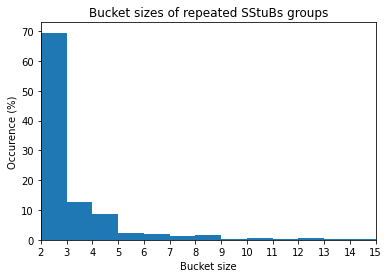

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import json
%matplotlib inline

MIN_BUCKET_SIZE = 2
MAX_BUCKET_SIZE = 15

bucket_sizes = []
for bucket in BUCKETS:
    bucket_size = len(bucket)
    if MIN_BUCKET_SIZE <= bucket_size and bucket_size <= MAX_BUCKET_SIZE:
        bucket_sizes.append(len(bucket))

plt.hist(bucket_sizes, density=True, bins=MAX_BUCKET_SIZE-MIN_BUCKET_SIZE);
plt.ylabel('Occurence (%)');
plt.xlabel('Bucket size');
plt.title('Bucket sizes of repeated SStuBs groups');
plt.xlim([MIN_BUCKET_SIZE, MAX_BUCKET_SIZE]);
plt.xticks(np.arange(MIN_BUCKET_SIZE, MAX_BUCKET_SIZE+1, 1.0));
plt.gca().yaxis.set_major_formatter(PercentFormatter(True, symbol=None));
plt.show();


Script for computing how are **SStuBs in buckets unique or duplicated**

In [ ]:
import json

TOTAL_BUCKETS = len(BUCKETS)
TOTAL_DUPLICATED_SOURCE_BUCKETS = 0
TOTAL_DUPLICATED_SOURCE_SSTUBS = 0
TOTAL_NON_DUPLICATED_SOURCE_BUCKETS = 0
TOTAL_NON_DUPLICATED_SOURCE_SSTUBS = 0

counter = 500

for bucket in BUCKETS:
    duplicates_source = all(x["sourceBeforeFix"] == bucket[0]["sourceBeforeFix"] for x in bucket)

    if duplicates_source:
        TOTAL_DUPLICATED_SOURCE_BUCKETS += 1
        TOTAL_DUPLICATED_SOURCE_SSTUBS += len(bucket)
    else:
        TOTAL_NON_DUPLICATED_SOURCE_BUCKETS += 1
        TOTAL_NON_DUPLICATED_SOURCE_SSTUBS += len(bucket)
        # counter -= 1
        # for sstub in bucket:
        #     code = sstub["sourceBeforeFix"]
        #     if not code.isnumeric():
        #         print(code)
        # if not counter:
        #     break

print("Total SStuB buckets: ", TOTAL_BUCKETS)
print("\nBuckets with idential sourceBeforeFix: {:.2f}% ({}/{})".format(TOTAL_DUPLICATED_SOURCE_BUCKETS/TOTAL_BUCKETS*100, TOTAL_DUPLICATED_SOURCE_BUCKETS, TOTAL_BUCKETS))
print("Total number of SStuBs in identical buckets: ", TOTAL_DUPLICATED_SOURCE_SSTUBS)
print("\nBuckets with non-identical sourceBeforeFix: {:.2f}% ({}/{})".format(TOTAL_NON_DUPLICATED_SOURCE_BUCKETS/TOTAL_BUCKETS*100, TOTAL_NON_DUPLICATED_SOURCE_BUCKETS, TOTAL_BUCKETS))
print("Total number of SStuBs in non-identical buckets: ", TOTAL_NON_DUPLICATED_SOURCE_SSTUBS)
        

Total SStuB buckets:  19234

Buckets with idential sourceBeforeFix: 99.17% (19074/19234)
Total number of SStuBs in identical buckets:  25968

Buckets with non-identical sourceBeforeFix: 0.83% (160/19234)
Total number of SStuBs in non-identical buckets:  2747


Investigate using **string equality instead of LSH**

In [ ]:
import json

BUCKETS_EQUAL = {}
TOTAL_BUCKETS_EQUAL = 0
TOTAL_DUPLICATED_SOURCE_BUCKETS_EQUAL = 0
TOTAL_DUPLICATED_SOURCE_SSTUBS_EQUAL = 0
TOTAL_NON_DUPLICATED_SOURCE_BUCKETS_EQUAL = 0
TOTAL_NON_DUPLICATED_SOURCE_SSTUBS_EQUAL = 0

for sstub in SSTUBS:
    sstub_hash = sstub["projectName"] + sstub["bugType"] + str(hash(sstub["sourceBeforeFix"]))
    if BUCKETS_EQUAL.get(sstub_hash, False):
        BUCKETS_EQUAL[sstub_hash].append(sstub)
    else:
        BUCKETS_EQUAL[sstub_hash] = [sstub]

for _, bucket in BUCKETS_EQUAL.items():
    if len(bucket) > 1:
        TOTAL_DUPLICATED_SOURCE_BUCKETS_EQUAL += 1
        TOTAL_DUPLICATED_SOURCE_SSTUBS_EQUAL += len(bucket)
    else:
        TOTAL_NON_DUPLICATED_SOURCE_BUCKETS_EQUAL += 1
        TOTAL_NON_DUPLICATED_SOURCE_SSTUBS_EQUAL += len(bucket)

TOTAL_BUCKETS_EQUAL = len(BUCKETS_EQUAL)
print("Total SStuB buckets: ", TOTAL_BUCKETS_EQUAL)
print("\nBuckets with identical sourceBeforeFix: {:.2f}% ({}/{})".format(TOTAL_DUPLICATED_SOURCE_BUCKETS_EQUAL/TOTAL_BUCKETS_EQUAL*100, TOTAL_DUPLICATED_SOURCE_BUCKETS_EQUAL, TOTAL_BUCKETS_EQUAL))
print("Total number of SStuBs in identical buckets: ", TOTAL_DUPLICATED_SOURCE_SSTUBS_EQUAL)
print("\nBuckets with non-identical sourceBeforeFix: {:.2f}% ({}/{})".format(TOTAL_NON_DUPLICATED_SOURCE_BUCKETS_EQUAL/TOTAL_BUCKETS_EQUAL*100, TOTAL_NON_DUPLICATED_SOURCE_BUCKETS_EQUAL, TOTAL_BUCKETS_EQUAL))
print("Total number of SStuBs in non-identical buckets: ", TOTAL_NON_DUPLICATED_SOURCE_SSTUBS_EQUAL)


Total SStuB buckets:  19695

Buckets with identical sourceBeforeFix: 18.35% (3615/19695)
Total number of SStuBs in identical buckets:  12635

Buckets with non-identical sourceBeforeFix: 81.65% (16080/19695)
Total number of SStuBs in non-identical buckets:  16080
